2 — Learning plan (step-by-step)

Beginner

Understand FIFO concept & operations.

Implement queue using array (simple but has issues).

Implement queue using linked list (simple & flexible).

Intermediate
4. Circular buffer (array-based circular queue) — solves wasted space.
5. Amortized analysis & dynamic resizing (growable circular queue).
6. Implement queue using two stacks (classic trick).
7. Learn deque (double-ended queue) and difference with queue.
8. Priority Queue basics (heap-based) — conceptually different (not FIFO).

## Answers & Solutions 

### 1 — FIFO concept & main operations (quick, clear)

A queue is a linear data structure that follows FIFO — First In, First Out.
Think of a queue like people in a line: whoever comes first gets served first.

Core operations:

enqueue(x) — add x to the rear (tail).

dequeue() — remove and return the element at the front (head).

peek() / front() — view the front element without removing.

isEmpty() — true if no items.

isFull() — for fixed-size queues.

Typical use-cases: BFS, printer spoolers, task scheduling, buffers.

### 2 — Implement queue using an array (naïve) — code + explanation

Problem with naive array: if you keep incrementing front and rear, space at the start gets wasted. This simple implementation demonstrates the idea but has that drawback.

Runnable Python (naïve):

In [31]:
class Simple_queue:
    def __init__(self,capacity=100):
        self.arr = [None] * capacity
        self.capacity = capacity
        self.front = 0   # index of current front element
        self.rear = 0   # index of current rear element
        self.size = 0    # current size of the queue
        
    def is_empty(self):
        return self.size == 0
    
    def is_full(self):
        return self.size == self.capacity
    def enqueue(self, item):
        if self.is_full():
           print("Queue is full. Cannot enqueue.")
           raise Exception("Queue Overflow")
        
        self.arr[self.rear] = item
        self.rear += 1 
        self.size += 1
        
    def dequeue(self):
        if self.is_empty():
            print("Queue is empty. Cannot dequeue.")
            raise Exception("Queue Underflow")
        print(self.front)
        item = self.arr[self.front]
        self.arr[self.front] = None  # Optional: Clear the slot
        self.front += 1
        print(self.front)
        self.size -= 1
        return item
    
    def peek(self):
        if self.is_empty():
            print("Queue is empty. Cannot peek.")
            raise Exception("Queue Underflow")
        return self.arr[self.front]
    def __str__(self):
        return f"SimpleQueue(front={self.front}, rear={self.rear}, size={self.size}, data={self.arr})"

q = Simple_queue(5)
q.enqueue(10)
q.enqueue(20)
q.enqueue(30)
q.enqueue(40)
q.enqueue(50)
print(q)
q.dequeue()
print(q)
print(q.peek())
# q.enqueue(60)

SimpleQueue(front=0, rear=5, size=5, data=[10, 20, 30, 40, 50])
0
1
SimpleQueue(front=1, rear=5, size=4, data=[None, 20, 30, 40, 50])
20


In [ ]:
class myQueue:
    def __init__(self, capacity):
         #Maximum number of elements the queue can hold.
        self.capacity = capacity
        #  Array to store queue elements.
        self.arr = [0] * capacity
        #  Current number of elements in the queue.
        self.size = 0

    # Check if queue is empty
    def isEmpty(self):
        return self.size == 0

    # Check if queue is full
    def isFull(self):
        return self.size == self.capacity

    # Enqueue
    def enqueue(self, x):
        if self.isFull():
            print("Queue is full!")
            return
        self.arr[self.size] = x
        self.size += 1

    # Dequeue
    def dequeue(self):
        if self.isEmpty():
            print("Queue is empty!")
            return
        for i in range(1, self.size):
            self.arr[i - 1] = self.arr[i]
        self.size -= 1

    # Get front element
    def getFront(self):
        if self.isEmpty():
            print("Queue is empty!")
            return -1
        return self.arr[0]
        
    def getRear(self):
        if self.isEmpty():
           print("Queue is empty!")
           return -1
        return self.arr[self.size - 1]


# Driver code
if __name__ == '__main__':
    q = myQueue(3)
    
    q.enqueue(10)
    q.enqueue(20)
    q.enqueue(30)
    print("Front:", q.getFront())  
    
    q.dequeue()
    print("Front:", q.getFront())  
    print("Rear:", q.getRear())  
    
    q.enqueue(40)

### 3 — Implement queue using linked list (recommended beginner approach)

This is the usual recommended implementation: keep head (front) and tail (rear) pointers. No wasted space and both operations remain O(1).

In [44]:
class Node :
    def __init__(self,data):
        self.data = data
        self.next = None 
        
class Linked_list_queue:
    def __init__(self) :
        self.head = None
        self.tail = None    
        self.size = 0
        
    def is_empty(self):
        return self.size == 0
    
    def enqueue(self, item):
        new_node = Node(item)
        if self.tail: # there are existing nodes
            self.tail.next = new_node
        self.tail = new_node 
        if not self.head: # first node being added
            self.head = new_node
        self.size += 1
    
    def dequeue(self):
        if self.is_empty():
            raise Exception("Queue is empty")
        item = self.head.data
        self.head = self.head.next
        if not self.head:  # If the queue is now empty, update tail to None
            self.tail = None
        self.size -= 1
    
    def peek(self):
        if self.is_empty():
            raise Exception("Queue is empty")
        return self.head.data

        
    def __len__(self):
        return self.size
    
    def __iter__(self):
        cur = self.head
        while cur:
            yield cur.data
            cur = cur.next


    def __str__(self):
        return "LinkedQueue([" + ", ".join(str(x) for x in self) + "])"
    
    
q = Linked_list_queue()
q.enqueue(10)
q.enqueue(20)
q.enqueue(30)
q.enqueue(40)   
q.enqueue(50)
q.enqueue(60)
q.enqueue(70)
print(q)
q.dequeue()
print(q)
        

LinkedQueue([10, 20, 30, 40, 50, 60, 70])
LinkedQueue([20, 30, 40, 50, 60, 70])


In [ ]:
class Node:
    def __init__(self, new_data):
        self.data = new_data
        self.next = None

class myQueue:
    def __init__(self):
        self.front = None
        self.rear = None
        self.currSize = 0  
        
    # Check if the queue is empty
    def isEmpty(self):
        return self.front is None

    # Add element to the queue
    def enqueue(self, new_data):
        new_node = Node(new_data)
        if self.isEmpty():
            self.front = self.rear = new_node
        else:
            self.rear.next = new_node
            self.rear = new_node
            
        # increment size
        self.currSize += 1 

    # Remove element from the queue and return it
    def dequeue(self):
        if self.isEmpty():
            print("Queue Underflow")
            return -1
        removedData = self.front.data
        self.front = self.front.next
        if self.front is None:
            self.rear = None
            
        # decrement size
        self.currSize -= 1 
        return removedData

    # Return the front element
    def getfront(self):
        if self.isEmpty():
            print("Queue is empty")
            return -1
        return self.front.data

    # Return size in O(1)
    def size(self):
        return self.currSize

if __name__ == "__main__":
    q = myQueue()
    
    q.enqueue(10)
    q.enqueue(20)
    
    print("Dequeue:", q.dequeue())
    
    q.enqueue(30)
    
    print("Front:", q.getfront())
    print("Size:", q.size())

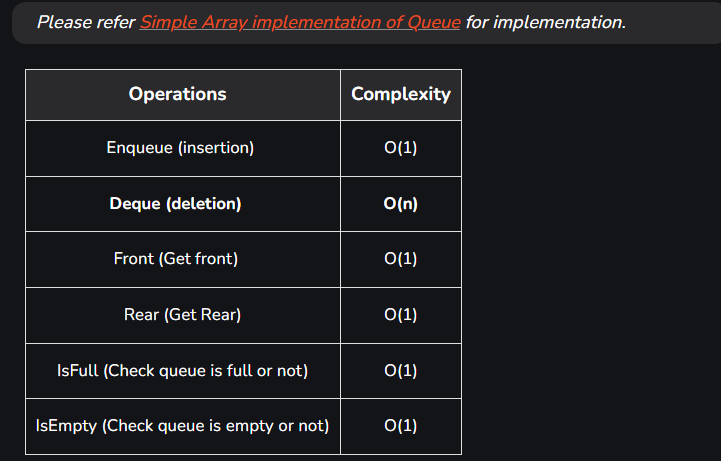

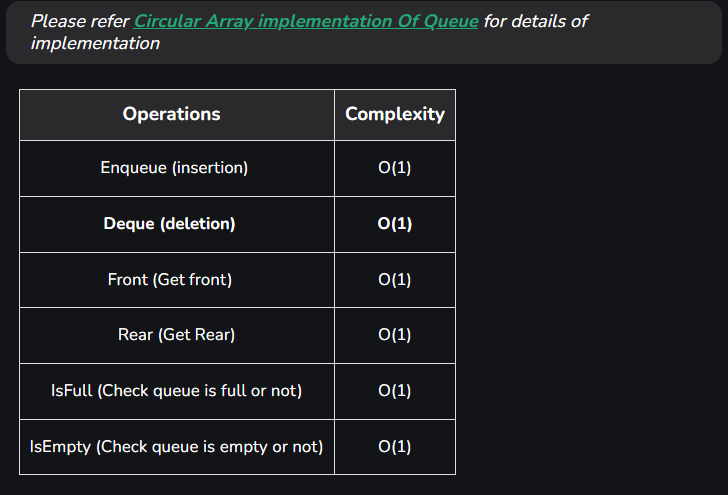